In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np


In [2]:
df=pd.read_csv('data/columnas_final.csv')

#### Vamos a realizar un EDA sobre los datos de nuestro nuevo DataFrame que contiene solo las columnas seleciconadas para el analisis.

Redefinimos las preguntas 

Preguntas nuevas:

- ¿Cual es el ratio de hombres y mujeres segun el perfil?
- ¿Cual es perfil educativo para cada puesto?
- Herramientas mas utilizadas segun los perfiles. 
- ¿Cuál es la diferencia de salarios entre hombres y mujeres segun el perfil?
- Perfil segun pais que herramientas usan, en coparativa con España.


Extras:
- ¿Cómo se distribuye este porcentaje segun los paises?


Conteo de las filas que estan ducplicadas 

In [3]:
df.duplicated().sum()

0

Calculamos el porcentaje de nulos que tenemos en cada una de nuestras columnas

In [4]:
df.isnull().sum()*100/df.shape[0]

level_0                   0.000000
index                     0.000000
time                      0.000000
age                       0.000000
gender                    0.000000
pais                      0.000000
formacion                 0.000000
puesto                    0.000000
experiencia_prog          0.000000
lenguaje_top              3.977207
exp_ml                    8.543487
tamaño_empresa           37.431179
uso_ml                   38.582374
salario                  40.742309
inversion_ml             41.543141
ppal_herramienta_data    28.814538
lenguaje_prog             3.973357
plataforma                4.000308
plat_cursos              30.189042
nubes                    64.671005
plataforma_top           87.960574
dtype: float64

In [5]:
df.head()

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,...,tamaño_empresa,uso_ml,salario,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top
0,0,0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,...,50-249 employees,No (we do not use ML methods),"25,000-29,999",$100-$999,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"edX,Kaggle Learn Courses,DataCamp,Udacity,Udemy","GitHub , Kaggle",NaN
1,1,1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,...,"1000-9,999 employees",We are exploring ML methods (and may one day p...,"60,000-69,999",$0 ($USD),"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook","Kaggle Learn Courses,Cloud-certification progr...",NaN,NaN
2,2,2,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,...,"1000-9,999 employees",I do not know,$0-999,$0 ($USD),"Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",DataCamp,I do not share my work publicly,NaN
3,3,3,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,...,"1000-9,999 employees",I do not know,"30,000-39,999",$0 ($USD),"Local development environments (RStudio, Jupyt...",Python,"Spyder,Jupyter Notebook",edX,NaN,NaN
4,4,4,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,...,50-249 employees,We use ML methods for generating insights (but...,"30,000-39,999","$1000-$9,999","Local development environments (RStudio, Jupyt...","Python, C, MATLAB","Spyder,MATLAB ,Jupyter Notebook","Kaggle Learn Courses,Udemy",I do not share my work publicly,NaN


In [6]:
df.tail()

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,...,tamaño_empresa,uso_ml,salario,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top
25968,25968,25968,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,...,"10,000 or more employees",We are exploring ML methods (and may one day p...,"15,000-19,999","$1000-$9,999","Business intelligence software (Salesforce, Ta...","Python, SQL, Javascript, Bash","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Kaggle Learn Courses,DataCamp,Udacity,Udemy,Li...","GitHub , Colab",Amazon Web Services (AWS)
25969,25969,25969,253,22-24,Man,China,Master’s degree,Student,1-3 years,Python,...,NaN,NaN,NaN,NaN,NaN,Python,PyCharm,NaN,NaN,NaN
25970,25970,25970,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,...,"1000-9,999 employees",I do not know,$0-999,$1-$99,"Basic statistical software (Microsoft Excel, G...",NaN,NaN,LinkedIn Learning,NaN,NaN
25971,25971,25971,277,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,...,"10,000 or more employees","We have well established ML methods (i.e., mod...",NaN,NaN,NaN,"Python, SQL","Notepad++,Jupyter Notebook",NaN,NaN,NaN
25972,25972,25972,255,18-21,Man,India,Bachelor’s degree,Business Analyst,I have never written code,NaN,...,0-49 employees,I do not know,$0-999,$0 ($USD),"Advanced statistical software (SPSS, SAS, etc.)",NaN,NaN,None,NaN,NaN


In [7]:
df.dtypes

level_0                   int64
index                     int64
time                      int64
age                      object
gender                   object
pais                     object
formacion                object
puesto                   object
experiencia_prog         object
lenguaje_top             object
exp_ml                   object
tamaño_empresa           object
uso_ml                   object
salario                  object
inversion_ml             object
ppal_herramienta_data    object
lenguaje_prog            object
plataforma               object
plat_cursos              object
nubes                    object
plataforma_top           object
dtype: object

In [8]:
df.shape

(25973, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25973 entries, 0 to 25972
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   level_0                25973 non-null  int64 
 1   index                  25973 non-null  int64 
 2   time                   25973 non-null  int64 
 3   age                    25973 non-null  object
 4   gender                 25973 non-null  object
 5   pais                   25973 non-null  object
 6   formacion              25973 non-null  object
 7   puesto                 25973 non-null  object
 8   experiencia_prog       25973 non-null  object
 9   lenguaje_top           24940 non-null  object
 10  exp_ml                 23754 non-null  object
 11  tamaño_empresa         16251 non-null  object
 12  uso_ml                 15952 non-null  object
 13  salario                15391 non-null  object
 14  inversion_ml           15183 non-null  object
 15  ppal_herramienta_da

In [10]:
df['puesto'].value_counts()

Student                         6804
Data Scientist                  3616
Software Engineer               2449
Other                           2393
Data Analyst                    2301
Currently not employed          1986
Research Scientist              1538
Machine Learning Engineer       1499
Business Analyst                 968
Program/Project Manager          849
Data Engineer                    668
Product Manager                  319
Statistician                     313
DBA/Database Engineer            171
Developer Relations/Advocacy      99
Name: puesto, dtype: int64

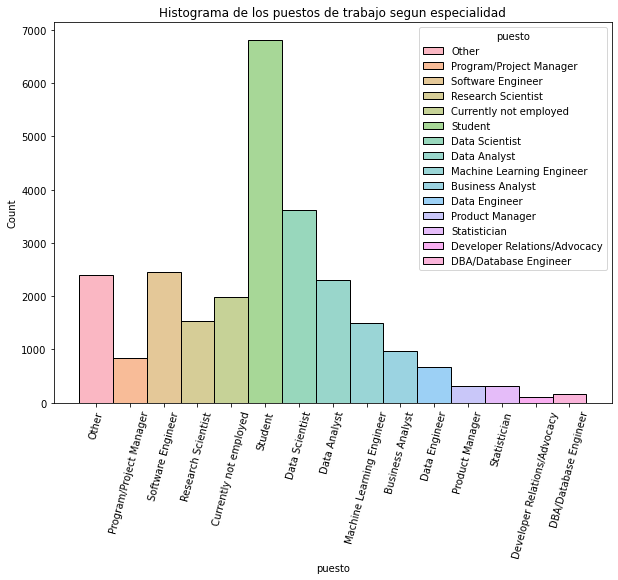

In [11]:
plt.figure(figsize =(10,7))

# seleccionamos el histplot y le añadimos el parámetro kde que nos va a mostrar una línea de tendencia 
fig = sns.histplot(x=df['puesto'], data = df, hue = 'puesto', kde=True)

fig.set_title('Histograma de los puestos de trabajo segun especialidad')

plt.xticks(rotation= 75)

# mostramos la gráfica
plt.show()

SPRINT 3

-   Limpieza de nulos
-   Categorizaciones
-   Cambiar tipo de dato (columna)  
-   Columna salarios modificar el tipo de dato y crear rango
-   Diseño de gráfica (Visualizacion), storytelling de los datos.

## SPRINT 3

Preguntas:

- ¿Cual es el ratio de hombres y mujeres segun el perfil?
- ¿Cual es perfil educativo para cada puesto?
- Herramientas mas utilizadas segun los perfiles. 
- ¿Cuál es la diferencia de salarios entre hombres y mujeres segun el perfil?
- Perfil segun pais que herramientas usan, en coparativa con España.


Extras:
- ¿Cómo se distribuye este porcentaje segun los paises?

In [12]:
df.head(2)

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,...,tamaño_empresa,uso_ml,salario,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top
0,0,0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,...,50-249 employees,No (we do not use ML methods),"25,000-29,999",$100-$999,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"edX,Kaggle Learn Courses,DataCamp,Udacity,Udemy","GitHub , Kaggle",NaN
1,1,1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,...,"1000-9,999 employees",We are exploring ML methods (and may one day p...,"60,000-69,999",$0 ($USD),"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook","Kaggle Learn Courses,Cloud-certification progr...",NaN,NaN



---
- ¿Cual es el ratio de hombres y mujeres segun el perfil?

In [13]:
df.gender.value_counts()

Man                        20598
Woman                       4890
Prefer not to say            355
Nonbinary                     88
Prefer to self-describe       42
Name: gender, dtype: int64

Vemos que la columna de genero nos ofrece todos los datos de manera clara para trabajar con ellos.

In [14]:
df.puesto.value_counts()

Student                         6804
Data Scientist                  3616
Software Engineer               2449
Other                           2393
Data Analyst                    2301
Currently not employed          1986
Research Scientist              1538
Machine Learning Engineer       1499
Business Analyst                 968
Program/Project Manager          849
Data Engineer                    668
Product Manager                  319
Statistician                     313
DBA/Database Engineer            171
Developer Relations/Advocacy      99
Name: puesto, dtype: int64

In [15]:
df.puesto.isnull().sum()

0

In [16]:
df_crosstab = pd.crosstab(df['gender'], 
                            df['puesto']) 
df_crosstab

puesto,Business Analyst,Currently not employed,DBA/Database Engineer,Data Analyst,Data Engineer,Data Scientist,Developer Relations/Advocacy,Machine Learning Engineer,Other,Product Manager,Program/Project Manager,Research Scientist,Software Engineer,Statistician,Student
gender,,,,,,,,,,,,,,,
Man,779,1479,141,1759,561,2971,79,1285,1926,266,742,1233,2045,239,5093
Nonbinary,3,11,1,5,1,7,2,7,6,3,3,6,7,0,26
Prefer not to say,10,29,9,28,7,45,2,25,26,5,13,22,30,3,101
Prefer to self-describe,1,4,0,4,1,9,0,3,6,0,0,3,1,0,10
Woman,175,463,20,505,98,584,16,179,429,45,91,274,366,71,1574


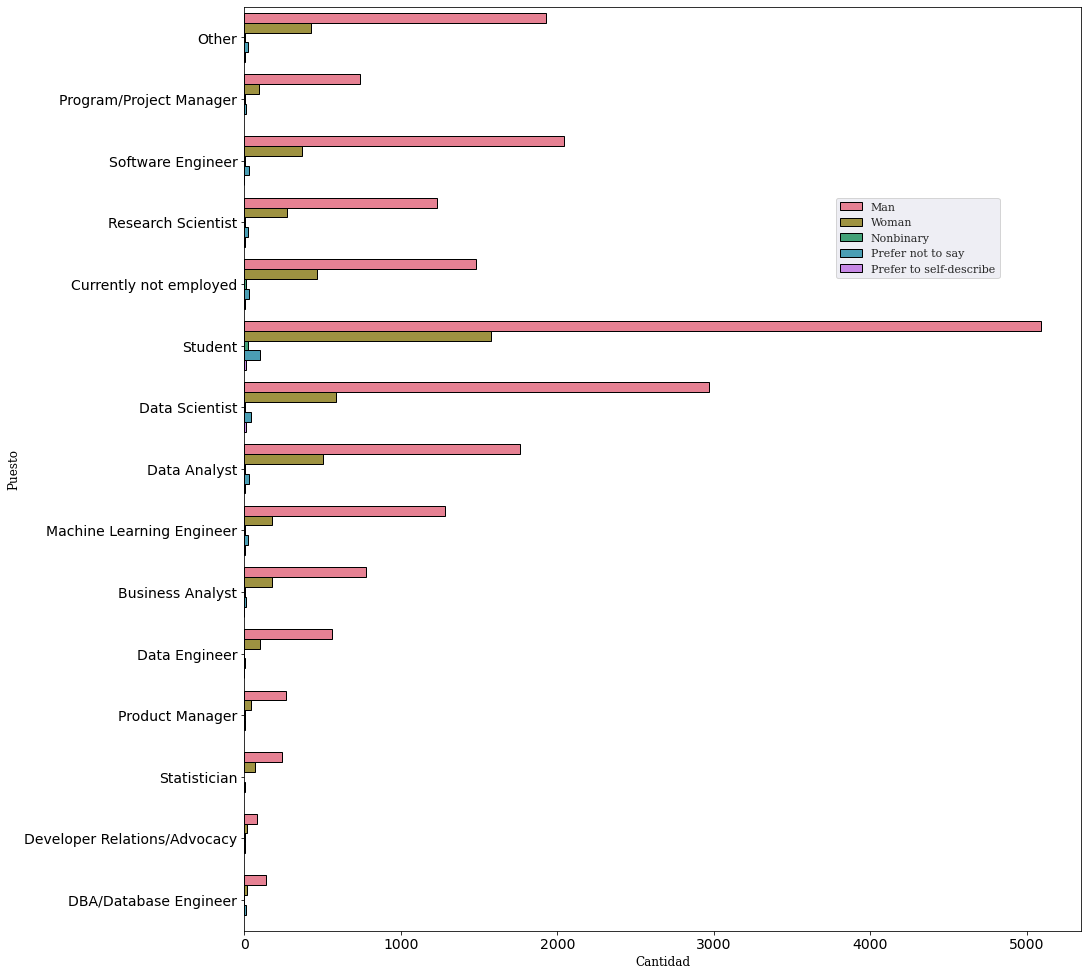

In [17]:
plt.figure(figsize = (15, 17))

fig = sns.countplot(data = df, y = "puesto", hue = "gender", palette = "husl", edgecolor = "black")

fig.set(xlabel = "Cantidad", ylabel = "Puesto")

sns.set(font = "serif")

plt.legend(bbox_to_anchor = (0.7, 0.7))

plt.xlabel("Cantidad", fontsize = 20, font = "serif")
plt.ylabel("Puesto", fontsize = 20, font = "serif")

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14);

---

- ¿Cual es perfil educativo para cada puesto?

In [18]:
df.puesto.value_counts()

Student                         6804
Data Scientist                  3616
Software Engineer               2449
Other                           2393
Data Analyst                    2301
Currently not employed          1986
Research Scientist              1538
Machine Learning Engineer       1499
Business Analyst                 968
Program/Project Manager          849
Data Engineer                    668
Product Manager                  319
Statistician                     313
DBA/Database Engineer            171
Developer Relations/Advocacy      99
Name: puesto, dtype: int64

In [19]:
df.formacion.value_counts()

Master’s degree                                                      10132
Bachelor’s degree                                                     9907
Doctoral degree                                                       2795
Some college/university study without earning a bachelor’s degree     1735
I prefer not to answer                                                 627
No formal education past high school                                   417
Professional doctorate                                                 360
Name: formacion, dtype: int64

In [20]:
df.formacion.isnull().sum()

0

In [21]:
df_crosstab = pd.crosstab(df['formacion'], 
                            df['puesto']) 
df_crosstab

puesto,Business Analyst,Currently not employed,DBA/Database Engineer,Data Analyst,Data Engineer,Data Scientist,Developer Relations/Advocacy,Machine Learning Engineer,Other,Product Manager,Program/Project Manager,Research Scientist,Software Engineer,Statistician,Student
formacion,,,,,,,,,,,,,,,
Bachelor’s degree,319,858,72,893,248,1089,36,502,721,102,230,112,1086,67,3572
Doctoral degree,49,116,2,120,33,543,6,163,317,17,82,862,116,75,294
I prefer not to answer,27,89,7,56,17,60,4,40,74,6,23,21,65,5,133
Master’s degree,487,726,73,1027,309,1726,34,656,1052,168,444,422,973,135,1900
No formal education past high school,22,55,4,37,16,30,7,20,49,3,18,9,44,0,103
Professional doctorate,6,26,0,24,2,49,3,30,48,4,17,99,20,11,21
Some college/university study without earning a bachelor’s degree,58,116,13,144,43,119,9,88,132,19,35,13,145,20,781


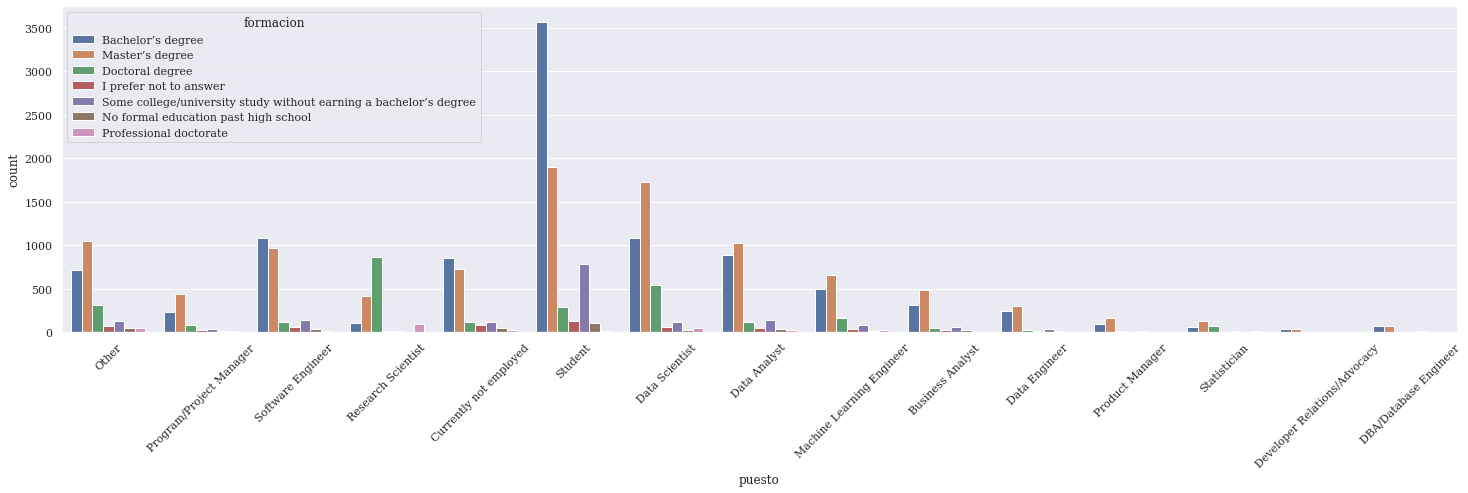

In [22]:
plt.figure( figsize=(25,6))

#for ax in fig.axes:
 #x.tick_params(labelrotation=45)

#for i in range(len(categoricas.columns)):
fig = sns.countplot(x = 'puesto', data = df, hue= 'formacion')

plt.xticks(rotation = 45)
plt.show(); 

In [23]:
df.columns

Index(['level_0', 'index', 'time', 'age', 'gender', 'pais', 'formacion',
       'puesto', 'experiencia_prog', 'lenguaje_top', 'exp_ml',
       'tamaño_empresa', 'uso_ml', 'salario', 'inversion_ml',
       'ppal_herramienta_data', 'lenguaje_prog', 'plataforma', 'plat_cursos',
       'nubes', 'plataforma_top'],
      dtype='object')

---
- Herramientas mas utilizadas segun los perfiles.

In [24]:
df.ppal_herramienta_data.value_counts()

Basic statistical software (Microsoft Excel, Google Sheets, etc.)       7246
Local development environments (RStudio, JupyterLab, etc.)              7170
Business intelligence software (Salesforce, Tableau, Spotfire, etc.)    1184
Cloud-based data software & APIs (AWS, GCP, Azure, etc.)                 997
Other                                                                    985
Advanced statistical software (SPSS, SAS, etc.)                          907
Name: ppal_herramienta_data, dtype: int64

In [25]:
df.ppal_herramienta_data.isnull().sum() # Ver que tratamiento hacer con los nulos de esta columna.

7484

In [26]:
df.ppal_herramienta_data.shape

(25973,)

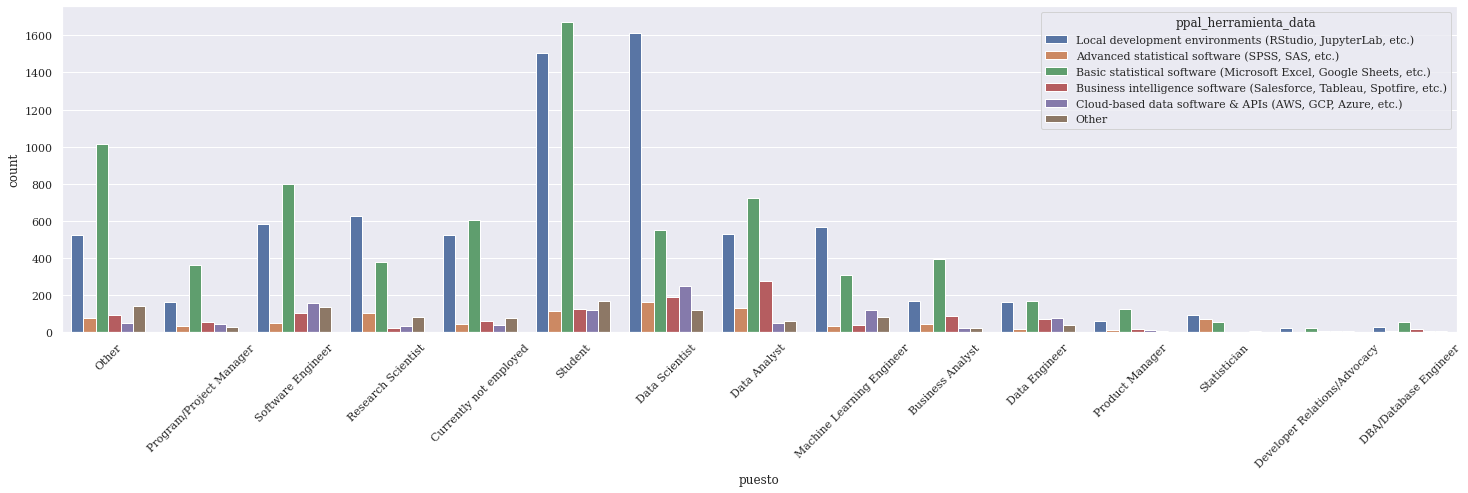

In [27]:
plt.figure( figsize=(25,6))

#for ax in fig.axes:
 #x.tick_params(labelrotation=45)

#for i in range(len(categoricas.columns)):
fig = sns.countplot(x = 'puesto', data = df, hue= 'ppal_herramienta_data')

plt.xticks(rotation = 45)
plt.show(); 

Vamos a anlizar el lenguaje de programacion usado por puesto.

In [28]:
df.lenguaje_prog.value_counts()

Python                                                      4740
Python, SQL                                                 2374
Python, R, SQL                                              1160
Python, R                                                    955
Python, C++                                                  707
                                                            ... 
 R, SQL, C, Java, MATLAB                                       1
 R, SQL, C, Java                                               1
 R, C++, Java, Javascript, MATLAB                              1
Python, R, SQL, C++, Javascript, Julia, MATLAB                 1
Python, R, C, C++, Java, Javascript, Julia, Bash, MATLAB       1
Name: lenguaje_prog, Length: 825, dtype: int64

In [31]:
df["lenguaje_prog"].isnull().sum()

1032

In [36]:
df_lenguajeprog_sinnulos = df.copy()

In [39]:
df_lenguajeprog_sinnulos["lenguaje_prog"].replace(np.nan,"unknown",inplace=True)

In [40]:
df_lenguajeprog_sinnulos.isnull().sum()

level_0                      0
index                        0
time                         0
age                          0
gender                       0
pais                         0
formacion                    0
puesto                       0
experiencia_prog             0
lenguaje_top              1033
exp_ml                    2219
tamaño_empresa            9722
uso_ml                   10021
salario                  10582
inversion_ml             10790
ppal_herramienta_data     7484
lenguaje_prog                0
plataforma                1039
plat_cursos               7841
nubes                    16797
plataforma_top           22846
dtype: int64

Una vez eliminados los nulos ya podemos separar la columna

In [41]:
df_lenguajeprog_sinnulos['Lenguaje']= df_lenguajeprog_sinnulos["lenguaje_prog"].apply(lambda x: x[1:-1].split(',')) 

In [43]:
df_lenguajeprog_sinnulos.head(2)

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,...,uso_ml,salario,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top,Lenguaje
0,0,0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,...,No (we do not use ML methods),"25,000-29,999",$100-$999,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"edX,Kaggle Learn Courses,DataCamp,Udacity,Udemy","GitHub , Kaggle",NaN,"[ython, ]"
1,1,1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,...,We are exploring ML methods (and may one day p...,"60,000-69,999",$0 ($USD),"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook","Kaggle Learn Courses,Cloud-certification progr...",NaN,NaN,"[SQL, C, C++, Jav]"


In [45]:
df_lenguajeprog_sinnulos[['1','2','3','4','5','6','7','8','9','10','11','12']] = df_lenguajeprog_sinnulos["lenguaje_prog"].str.split(',', expand=True, n=-1)

In [47]:
pd.options.display.max_columns=None

In [50]:
df_lenguajeprog_sinnulos.sample(15)

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,exp_ml,tamaño_empresa,uso_ml,salario,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top,Lenguaje,1,2,3,4,5,6,7,8,9,10,11,12
9103,9103,9103,690,30-34,Man,South Korea,Master’s degree,Data Scientist,1-3 years,Python,1-2 years,"1000-9,999 employees","We recently started using ML methods (i.e., mo...","50,000-59,999",$100-$999,"Local development environments (RStudio, Jupyt...","Python, R","Visual Studio ,Jupyter Notebook",None,I do not share my work publicly,NaN,"[ython, ]",Python,R,None,None,None,None,None,None,None,None,None,None
2489,2489,2489,631,30-34,Man,Nigeria,Bachelor’s degree,Machine Learning Engineer,5-10 years,Python,< 1 year,0-49 employees,"We recently started using ML methods (i.e., mo...","150,000-199,999","$10,000-$99,999","Local development environments (RStudio, Jupyt...","Python, SQL, Other","Visual Studio Code (VSCode) ,PyCharm , Spyder,...","Udemy,University Courses (resulting in a unive...","GitHub , Personal blog , Kaggle , Colab",They all had a similarly enjoyable developer e...,"[ython, SQL, Othe]",Python,SQL,Other,None,None,None,None,None,None,None,None,None
15972,15972,15972,283,22-24,Man,Egypt,Bachelor’s degree,Statistician,I have never written code,NaN,NaN,0-49 employees,We use ML methods for generating insights (but...,"25,000-29,999",NaN,NaN,unknown,NaN,NaN,NaN,NaN,[nknow],unknown,None,None,None,None,None,None,None,None,None,None,None
9871,9871,9871,81742,22-24,Man,Russia,Master’s degree,Machine Learning Engineer,< 1 years,Python,NaN,NaN,NaN,NaN,NaN,NaN,"Python, SQL","Visual Studio ,PyCharm ,Jupyter Notebook",NaN,NaN,NaN,"[ython, SQ]",Python,SQL,None,None,None,None,None,None,None,None,None,None
20377,20377,20377,246,30-34,Prefer not to say,China,I prefer not to answer,Student,20+ years,Python,NaN,NaN,NaN,NaN,NaN,NaN,"Python, Java","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",NaN,NaN,NaN,"[ython, Jav]",Python,Java,None,None,None,None,None,None,None,None,None,None
16433,16433,16433,2332,22-24,Man,Ghana,Bachelor’s degree,Other,3-5 years,Python,1-2 years,0-49 employees,No (we do not use ML methods),$0-999,$100-$999,"Basic statistical software (Microsoft Excel, G...","Python, SQL, MATLAB","Visual Studio Code (VSCode) , Spyder,MATLAB ,J...","Kaggle Learn Courses,Udacity,Udemy,Cloud-certi...","GitHub , Kaggle",Google Cloud Platform (GCP),"[ython, SQL, MATLA]",Python,SQL,MATLAB,None,None,None,None,None,None,None,None,None
9880,9880,9880,628,30-34,Woman,Russia,Master’s degree,Data Scientist,1-3 years,SQL,< 1 year,"1000-9,999 employees","We recently started using ML methods (i.e., mo...","3,000-3,999","$1000-$9,999","Local development environments (RStudio, Jupyt...","Python, SQL","PyCharm , Notepad++,Jupyter Notebook","Kaggle Learn Courses,Udemy,University Courses ...","GitHub , Colab",NaN,"[ython, SQ]",Python,SQL,None,None,None,None,None,None,None,None,None,None
6089,6089,6089,586,18-21,Man,India,Master’s degree,Student,1-3 years,Python,< 1 year,NaN,NaN,NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, SQL, Java","Visual Studio Code (VSCode) ,PyCharm","Kaggle Learn Courses,Udemy,University Courses ...",NaN,NaN,"[ython, SQL, Jav]",Python,SQL,Java,None,None,None,None,None,None,None,None,None
10176,10176,10176,412,25-29,Woman,Egypt,Bachelor’s degree,Data Analyst,< 1 years,Python,I do not use machine learning methods,50-249 employees,We are exploring ML methods (and may one day p...,$0-999,"$1000-$9,999","Basic statistical software (Microsoft Excel, G...",SQL,"Visual Studio ,PyCharm , Notepad++,MATLAB","DataCamp,Udacity,Udemy,LinkedIn Learning,Unive...","GitHub , Kaggle",NaN,[SQ],SQL,None,None,None,None,None,None,None,None,None,None,None
5483,5483,5483,444,30-34,Man,Turkey,Master’s degree,Other,1-3 years,Python,1-2 years,0-49 employees,"We have well established ML methods (i.e., mod...",$0-999,"$10,000-$99,999","Basic statistical software (Microsoft Excel, G...",P

In [51]:
df_lenguajeprog_sinnulos.isnull().sum()

level_0                      0
index                        0
time                         0
age                          0
gender                       0
pais                         0
formacion                    0
puesto                       0
experiencia_prog             0
lenguaje_top              1033
exp_ml                    2219
tamaño_empresa            9722
uso_ml                   10021
salario                  10582
inversion_ml             10790
ppal_herramienta_data     7484
lenguaje_prog                0
plataforma                1039
plat_cursos               7841
nubes                    16797
plataforma_top           22846
Lenguaje                     0
1                            0
2                         7373
3                        14439
4                        20102
5                        23167
6                        24703
7                        25428
8                        25776
9                        25896
10                       25945
11      

In [57]:
df_lenguajeprog_sinnulos["1"][0:3]

0    Python
1       SQL
2    Python
Name: 1, dtype: object

In [58]:
df_lenguajeprog_sinnulos["1"].value_counts()

Python         21860
unknown         1032
 SQL             850
 R               757
 C               350
 None            319
 Other           237
 C++             178
 Java            164
 Javascript      119
 MATLAB           71
 Bash             15
 Swift            13
 Julia             8
Name: 1, dtype: int64

In [59]:
df_lenguajeprog_sinnulos["2"].value_counts()

 SQL           7128
 R             4577
 C             2090
 C++           1648
 Java           945
 Javascript     774
 MATLAB         567
 Other          499
 Bash           289
 Julia           53
 Swift           30
Name: 2, dtype: int64

In [60]:
df_lenguajeprog_sinnulos["3"].value_counts()


 SQL           2778
 C++           2074
 C             1709
 Java          1516
 Javascript    1227
 MATLAB         775
 Bash           683
 Other          659
 Julia           73
 Swift           40
Name: 3, dtype: int64

In [61]:
df_lenguajeprog_sinnulos["4"].value_counts()


 C++           1253
 Java          1153
 Javascript    1021
 MATLAB         622
 Bash           576
 Other          568
 C              560
 Julia           67
 Swift           51
Name: 4, dtype: int64

In [62]:
df_lenguajeprog_sinnulos["5"].value_counts()

 Java          743
 Javascript    594
 MATLAB        404
 C++           382
 Other         306
 Bash          300
 Julia          45
 Swift          32
Name: 5, dtype: int64

In [ ]:
#df_lenguajeprog_sinnulos[['python','R','SQL','C','C++','java','javascript','julia','swift','bash','MATLAB','none','other']]

In [33]:
def separar_col (col):

    try:

        df['Lenguaje'] = df[col].apply(lambda x: x[1:-1].split(',')) 

    except:
        return np.nan    

Próximos pasos:

* Qué conclusión podemos obtener de las columnas de lenguajes de programación?

* Cómo gestionar la columna "salario" para poder trabajar con ella? 